<a href="https://www.suss.edu.sg/">
   <img src = "https://www.suss.edu.sg/images/default-source/default-album/logo-with-tagline.png" width =200> 

# <center>ANL252 Python for Data Analytics-End-Of-Course Assessment<center>
# <center>July 2022 Presentation</center>

# <center>Tutorial Group: T09 <center>    
### <center>Instructor's Name: Dr Munish Kumar <center>    
### <center>Submission Date.: 05 September 2022 <center>
### <center>Name: Tan Wenying Audrey, PI number: K2170805<center>

# Libraries

In [1]:
#import pandas
import pandas as pd

#import matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#import seaborn
import seaborn as sns

#Import numpy
import numpy as np

#Import sklearn and modules
import sklearn
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split

#Import statsmodel
import statsmodels.api as sm

# Import Excel

In [2]:
# reading data frame from the csv file and replacing symbols as null values
df = pd.read_csv('ECA_Data.csv')

# Check basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

Detected null values in Education and Marital. 
Detected that R3 is an object instead of integer. 

In [4]:
df.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18756.000000,18731.000000,18769.000000,18769.000000,...,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,1.876900e+04,18769.000000,18769.000000,18769.000000
mean,9382.049710,168275.543716,9119.887343,177765.809100,0.219244,0.618307,1.789934,1.514922,35.578614,0.128776,...,0.038628,49985.762587,48168.321541,45025.373328,41058.509137,39624.961319,6.026392e+03,5651.754862,4764.085354,5185.538068
std,5418.203513,129405.294386,13045.368642,143092.431648,0.413746,0.485815,0.732326,0.519588,9.556397,0.954745,...,0.849596,71927.408384,70318.908697,66107.280567,61697.041169,59913.089587,2.289899e+04,18614.886581,15031.279673,17424.054451
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4690.000000,50000.000000,640.325000,56494.000000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,0.000000,3081.000000,2845.000000,2513.000000,1950.000000,1430.000000,1.000000e+03,579.000000,285.000000,215.000000
50%,9382.000000,140000.000000,3959.025000,148225.000000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,0.000000,21386.000000,20421.000000,19502.000000,18356.000000,17419.000000,2.132000e+03,2000.000000,1508.000000,1547.000000
75%,14074.000000,240000.000000,11975.250000,256826.000000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,0.000000,65145.000000,61943.000000,57687.000000,50758.000000,49792.000000,5.002000e+03,5000.000000,4068.000000,4095.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


# Question 2

# Data Pre-Processing

## Task 1: Find Null values and replace or drop them 

In [5]:
#get sum of null for columns with at least one null value
df[df.columns[df.isnull().any()]].isnull().sum()

EDUCATION    13
MARITAL      38
dtype: int64

In [6]:
#Find out the percentage of missing values in each column in df
percent_missing = df[df.columns[df.isnull().any()]].isnull().sum() * 100 / len(df)
df1 = pd.DataFrame({'percent_missing': percent_missing})
display(df1)

,percent_missing
EDUCATION,0.069263
MARITAL,0.202462


In [7]:
#check the skewness of the columns. Use median instead of mean to replace null if it is skewed.
df.skew()[["EDUCATION", "MARITAL"]]

/Users/audreytan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


EDUCATION    0.077203
MARITAL     -0.275421
dtype: float64

In [8]:
#check the unique values in each column
print(df.EDUCATION.unique())
print(df.MARITAL.unique())

[ 1.  2.  3.  0. nan]
[ 2.  1.  0. nan]


In [9]:
#replace the values in EDUCATION and MARITAL with description data
df=df.replace({'EDUCATION':{0:'Others',1:'Postgraduate',2:'Tertiary',3:'High School'},
               'MARITAL':{0:'Others',1:'Single',2:'Married'}})

In [10]:
display(df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,Postgraduate,Married,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,Tertiary,Married,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,High School,Single,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,Tertiary,Single,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,Tertiary,Single,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,High School,Single,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,High School,Married,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,Tertiary,Married,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,High School,Single,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [11]:
#find the mode for Marital
df['MARITAL'].mode()

0    Married
dtype: object

In [12]:
#Replace null in Marital by the mode of Marital as the data is skewed
df['MARITAL'] = np.where((df['MARITAL'].isnull()), df['MARITAL'].mode(), df['MARITAL'])

In [13]:
#find the mode for education
df['EDUCATION'].mode()

0    Tertiary
dtype: object

In [14]:
#Replace null in Education by the mode of Education as the data is skewed
df['EDUCATION'] = np.where((df['EDUCATION'].isnull()), df['EDUCATION'].mode(), df['EDUCATION'])

In [15]:
#Check that there is no more null
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

## Task 2: Conduct reasonability test on each column-Replace the outliers for ages

In [16]:
df.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,AGE,S1,S2,S3,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,...,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,1.876900e+04,18769.000000,18769.000000,18769.000000
mean,9382.049710,168275.543716,9119.887343,177765.809100,0.219244,0.618307,35.578614,0.128776,0.111514,0.088817,...,0.038628,49985.762587,48168.321541,45025.373328,41058.509137,39624.961319,6.026392e+03,5651.754862,4764.085354,5185.538068
std,5418.203513,129405.294386,13045.368642,143092.431648,0.413746,0.485815,9.556397,0.954745,0.929861,0.921901,...,0.849596,71927.408384,70318.908697,66107.280567,61697.041169,59913.089587,2.289899e+04,18614.886581,15031.279673,17424.054451
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4690.000000,50000.000000,640.325000,56494.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,...,0.000000,3081.000000,2845.000000,2513.000000,1950.000000,1430.000000,1.000000e+03,579.000000,285.000000,215.000000
50%,9382.000000,140000.000000,3959.025000,148225.000000,0.000000,1.000000,34.000000,0.000000,0.000000,0.000000,...,0.000000,21386.000000,20421.000000,19502.000000,18356.000000,17419.000000,2.132000e+03,2000.000000,1508.000000,1547.000000
75%,14074.000000,240000.000000,11975.250000,256826.000000,0.000000,1.000000,41.000000,0.000000,0.000000,0.000000,...,0.000000,65145.000000,61943.000000,57687.000000,50758.000000,49792.000000,5.002000e+03,5000.000000,4068.000000,4095.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,199.000000,7.000000,8.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


In [17]:
#check the skewness of the columns. Use median instead of mean to replace null if it is skewed.
df.skew()[["AGE"]]

/Users/audreytan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


AGE    1.942488
dtype: float64

In [18]:
#Age should not show -1 or 199
#Replace these values with the median age
df['AGE'].replace(to_replace=[-1, 199], value=df['AGE'].median(), inplace=True)

#Change data type for age to integer
df['AGE']=df['AGE'].astype(int)
#Check that it is changed
df.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,AGE,S1,S2,S3,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,...,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,18769.000000,1.876900e+04,18769.000000,18769.000000,18769.000000
mean,9382.049710,168275.543716,9119.887343,177765.809100,0.219244,0.618307,35.543982,0.128776,0.111514,0.088817,...,0.038628,49985.762587,48168.321541,45025.373328,41058.509137,39624.961319,6.026392e+03,5651.754862,4764.085354,5185.538068
std,5418.203513,129405.294386,13045.368642,143092.431648,0.413746,0.485815,9.157154,0.954745,0.929861,0.921901,...,0.849596,71927.408384,70318.908697,66107.280567,61697.041169,59913.089587,2.289899e+04,18614.886581,15031.279673,17424.054451
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4690.000000,50000.000000,640.325000,56494.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,...,0.000000,3081.000000,2845.000000,2513.000000,1950.000000,1430.000000,1.000000e+03,579.000000,285.000000,215.000000
50%,9382.000000,140000.000000,3959.025000,148225.000000,0.000000,1.000000,34.000000,0.000000,0.000000,0.000000,...,0.000000,21386.000000,20421.000000,19502.000000,18356.000000,17419.000000,2.132000e+03,2000.000000,1508.000000,1547.000000
75%,14074.000000,240000.000000,11975.250000,256826.000000,0.000000,1.000000,41.000000,0.000000,0.000000,0.000000,...,0.000000,65145.000000,61943.000000,57687.000000,50758.000000,49792.000000,5.002000e+03,5000.000000,4068.000000,4095.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,80.000000,7.000000,8.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


## Task 3: Find and replace special characters

In [19]:
#check the columns with special characters
import re

my_dict={}

#regex for all special characters
regex = re.compile('[^\w\s-]|_')

#Iterate through df and find special character
for col in df.columns:
    countx=len(df)
    county=0
    for i in df[col]:
#if no special characters are found
        if(regex.search(str(i)) == None):
            countx=countx-1
        else: 
            county=county+1
    if countx != 0 and county>0:
        my_dict.update({col:'FOUND SPECIAL CHAR'})
    else:
        my_dict.update({col:'NO SPECIAL CHAR'})
my_dict

{'ID': 'NO SPECIAL CHAR',
 'LIMIT': 'NO SPECIAL CHAR',
 'BALANCE': 'FOUND SPECIAL CHAR',
 'INCOME': 'NO SPECIAL CHAR',
 'RATING': 'NO SPECIAL CHAR',
 'GENDER': 'NO SPECIAL CHAR',
 'EDUCATION': 'NO SPECIAL CHAR',
 'MARITAL': 'NO SPECIAL CHAR',
 'AGE': 'NO SPECIAL CHAR',
 'S1': 'NO SPECIAL CHAR',
 'S2': 'NO SPECIAL CHAR',
 'S3': 'NO SPECIAL CHAR',
 'S4': 'NO SPECIAL CHAR',
 'S5': 'NO SPECIAL CHAR',
 'B1': 'NO SPECIAL CHAR',
 'B2': 'NO SPECIAL CHAR',
 'B3': 'NO SPECIAL CHAR',
 'B4': 'NO SPECIAL CHAR',
 'B5': 'NO SPECIAL CHAR',
 'R1': 'NO SPECIAL CHAR',
 'R2': 'NO SPECIAL CHAR',
 'R3': 'FOUND SPECIAL CHAR',
 'R4': 'NO SPECIAL CHAR',
 'R5': 'NO SPECIAL CHAR'}

In [20]:
#replace special characters except "-" with " ".
df.replace(to_replace=r'[\W\-]', value=r'', inplace=True, regex=True)

In [21]:
#Check that all special characters were removed
import re

my_dict={}

#regex for all special characters
regex = re.compile('[^\w\s-]|_')

#Iterate through df and find special character
for col in df.columns:
    countx=len(df)
    county=0
    for i in df[col]:
#if no special characters are found
        if(regex.search(str(i)) == None):
            countx=countx-1
        else: 
            county=county+1
    if countx != 0 and county>0:
        my_dict.update({col:'FOUND SPECIAL CHAR'})
    else:
        my_dict.update({col:'NO SPECIAL CHAR'})
my_dict

{'ID': 'NO SPECIAL CHAR',
 'LIMIT': 'NO SPECIAL CHAR',
 'BALANCE': 'FOUND SPECIAL CHAR',
 'INCOME': 'NO SPECIAL CHAR',
 'RATING': 'NO SPECIAL CHAR',
 'GENDER': 'NO SPECIAL CHAR',
 'EDUCATION': 'NO SPECIAL CHAR',
 'MARITAL': 'NO SPECIAL CHAR',
 'AGE': 'NO SPECIAL CHAR',
 'S1': 'NO SPECIAL CHAR',
 'S2': 'NO SPECIAL CHAR',
 'S3': 'NO SPECIAL CHAR',
 'S4': 'NO SPECIAL CHAR',
 'S5': 'NO SPECIAL CHAR',
 'B1': 'NO SPECIAL CHAR',
 'B2': 'NO SPECIAL CHAR',
 'B3': 'NO SPECIAL CHAR',
 'B4': 'NO SPECIAL CHAR',
 'B5': 'NO SPECIAL CHAR',
 'R1': 'NO SPECIAL CHAR',
 'R2': 'NO SPECIAL CHAR',
 'R3': 'NO SPECIAL CHAR',
 'R4': 'NO SPECIAL CHAR',
 'R5': 'NO SPECIAL CHAR'}

## Task 4: Data Reduction

In [22]:
df['R3']=df['R3'].astype(int)

In [23]:
df['BALANCE']=df['BALANCE'].astype(int)

In [24]:
#create a dictionary to replace the values in S1,S3,S4 later
keys = [-1,0,1,2,3,4,5,6,7]
values = ['Prompt','Minimum','Delays_more_than_1_month','Delays_more_than_1_month',
          'Delays_more_than_1_month','Delays_more_than_1_month','Delays_more_than_1_month',
          'Delays_more_than_1_month','Delays_more_than_1_month']
dictionary = {}
for i in range(len(keys)):
    dictionary[keys[i]] = values[i]
dictionary
    
#create a dictionary to replace the values in S2 later
keys1 = [-1,0,1,2,3,4,5,6,7,8]
values1 = ['Prompt','Minimum','Delays_more_than_1_month','Delays_more_than_1_month',
          'Delays_more_than_1_month','Delays_more_than_1_month','Delays_more_than_1_month',
          'Delays_more_than_1_month','Delays_more_than_1_month','Delays_more_than_1_month']
dictionary1 = {}
for i in range(len(keys1)):
    dictionary1[keys1[i]] = values1[i]

In [25]:
#replace the values in S1 to S4 with description data
df=df.replace({'S1':dictionary,
               'S2':dictionary1,
               'S3':dictionary,
               'S4':dictionary,
               'S5':dictionary})
df.tail()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
18764,18762,220000,33065,225862,0,0,HighSchool,Single,39,Minimum,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294,149966,0,0,HighSchool,Married,43,Prompt,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623,30327,1,0,Tertiary,Married,37,Delays_more_than_1_month,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0,94607,1,0,HighSchool,Single,41,Prompt,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804
18768,18766,50000,8387,40267,1,0,Tertiary,Single,46,Minimum,...,48905,49764,36535,32428,15313,1800,1430,1000,1000,1000


# Question 3

# Data Visualisation

In [26]:
#Extract all the rows with Gender = 1 or Female
contain_values = df[df['GENDER']==1]
#For these rows with Gender =F, filter out the Salary
contain_values = contain_values.filter(['AGE'])

#Extract all the rows with Gender = 0 or Male
contain_values2 = df[df['GENDER']==0]
#For these rows with Gender =M, filter out the Salary
contain_values2 = contain_values2.filter(['AGE'])

In [27]:
contain_values['AGE']=contain_values['AGE'].astype(int)
contain_values2['AGE']=contain_values2['AGE'].astype(int)

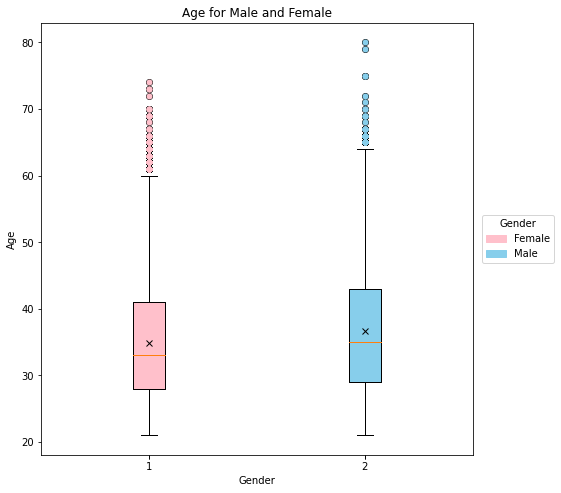

In [28]:
#Combining data of salaries from M and F into numpy array
data = np.array([contain_values, contain_values2], dtype=object)

#Set the size of the plot    
fig = plt.figure(figsize =(6, 6))
 
#Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#Creating plot
bp = ax.boxplot(data)

#X and Y Labels
plt.xlabel('Gender')
plt.ylabel('Age')

#Adding title
plt.title("Age for Male and Female")

#Adding ticks
plt.xticks([1, 2],['Female', 'Male'] )

#Plot the boxplot
box = plt.boxplot(data, #array to be plotted
                  patch_artist=True, #fill with color
                  flierprops={'markeredgecolor': 'None'}, #no marker edger for outliers
                  showmeans=True, #show the mean
                  meanprops={"marker":"x","markerfacecolor":"black", "markeredgecolor":"black"}) #set the marker type and colour of the mean

#Fill the outliers with two colours
cols = ['pink', 'skyblue']
for f, fc in zip(box['fliers'], cols):
    f.set_markerfacecolor(fc)

#Fill the boxplot with two colours
colors = ['pink', 'skyblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)        
        
#set legend
pink_patch=mpatches.Patch(color='pink',label="Female") #Set colour for Females in legend
blue_patch=mpatches.Patch(color='skyblue',label="Male") #Set colour for Males in legend
plt.legend(loc='center right', bbox_to_anchor=(1.2,0.5), ncol=1, handles=[pink_patch, blue_patch],title='Gender')

#show plot
plt.show()

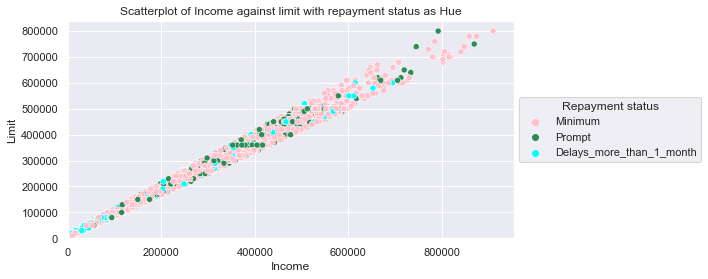

In [29]:
#Plot scatterplot with Seaborn

#To set the colours per Unit
colour_dict1 = dict({'Prompt':'seagreen',
                    'Minimum':'pink',
                    'Delays_more_than_1_month':'cyan'})


#Set the order in the legend
#orders=['0','1']

#To set the side of the scatterplot
sns.set(rc={"figure.figsize":(8, 4)})
    
#To display the scatterplot
g =sns.scatterplot(x="INCOME", y="LIMIT",
              hue="S1",
              data=df,
              palette=colour_dict1)

#Rename axis
plt.xlabel('Income')
plt.ylabel('Limit')

#To start the x and y axis at point 0
plt.xlim(0)
plt.ylim(0)

#To set the title 
plt.title('Scatterplot of Income against limit with repayment status as Hue')

#To set the legend location of scatterplot
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1,title='Repayment status')

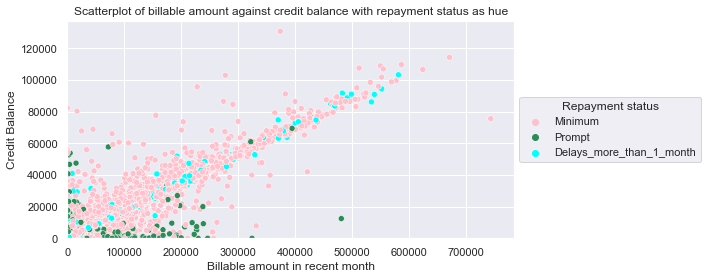

In [30]:
#Plot scatterplot with Seaborn

#To set the colours per Unit
colour_dict = dict({'Prompt':'seagreen',
                    'Minimum':'pink',
                    'Delays_more_than_1_month':'cyan'})

#Set the order in the legend
#orders=['0','1']

#To set the side of the scatterplot
sns.set(rc={"figure.figsize":(8, 4)})
    
#To display the scatterplot
g =sns.scatterplot(x="B1", y="BALANCE",
              hue="S1",
              data=df,
              palette=colour_dict)

#Rename axis
plt.xlabel('Billable amount in recent month')
plt.ylabel('Credit Balance')

#To start the x and y axis at point 0
plt.xlim(0)
plt.ylim(0)

#To set the title 
plt.title('Scatterplot of billable amount against credit balance with repayment status as hue')
#To set the legend location of scatterplot
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Repayment status')

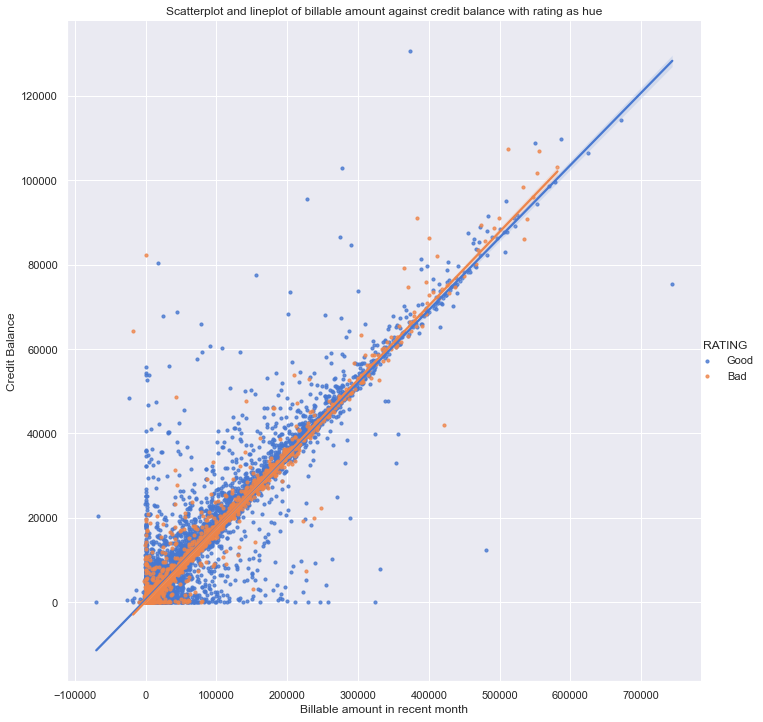

In [31]:
# Use seaborn to plot lineplot
h=sns.lmplot(x='B1',
             y='BALANCE',
            hue='RATING',
            data=df,
            legend=True,
            palette="muted",
            scatter_kws={"s":10},
            height=10)

labels=['Good', 'Bad']
for t, l in zip(h._legend.texts, labels):
    t.set_text(l)

#Rename axis
plt.xlabel('Billable amount in recent month')
plt.ylabel('Credit Balance')
    
plt.title("Scatterplot and lineplot of billable amount against credit balance with rating as hue")    
    
plt.show(h)

Text(0.5, 0, 'Education level')

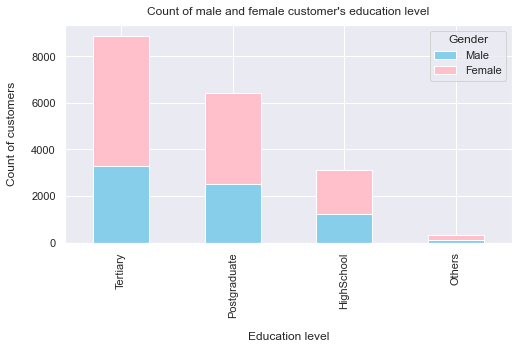

In [32]:
#create new dataframe of only Education and Gender
df_ed_gen= df[['EDUCATION','GENDER']]

# Get the #'s data points in the groups
gdf = df_ed_gen.groupby(['EDUCATION', 'GENDER'])['EDUCATION'].count()

# Since we want to stack by gender, lets make them columns
gdf = gdf.unstack('GENDER')

# If you want to choose a subset of columns to plot
col_to_plot = gdf.columns.tolist()

#sort education by largest count 
edu_order=['Tertiary', 'Postgraduate', 'HighSchool', 'Others']

# Plot command
gdf[col_to_plot].loc[edu_order].plot(kind='bar', stacked=True, color=['skyblue','pink'])
plt.legend(title='Gender',labels=['Male', 'Female'])
plt.title("Count of male and female customer's education level", y=1.02);
plt.ylabel("Count of customers", labelpad=14)
plt.xlabel("Education level", labelpad=14)

# Question 4

# Linear Regression to predict B1

## Getting dummy data

In [33]:
df.dtypes

ID            int64
LIMIT         int64
BALANCE       int64
INCOME        int64
RATING        int64
GENDER        int64
EDUCATION    object
MARITAL      object
AGE           int64
S1           object
S2           object
S3           object
S4           object
S5           object
B1            int64
B2            int64
B3            int64
B4            int64
B5            int64
R1            int64
R2            int64
R3            int64
R4            int64
R5            int64
dtype: object

In [34]:
#convert education to dummy data
dummy_ed= pd.get_dummies(df['EDUCATION'],drop_first=True,prefix="Ed")
df.drop(['EDUCATION'], axis=1, inplace=True)
df = df.join(dummy_ed)
df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,MARITAL,AGE,S1,S2,...,B4,B5,R1,R2,R3,R4,R5,Ed_Others,Ed_Postgraduate,Ed_Tertiary
0,1,210000,0,235822,1,1,Married,30,Minimum,Minimum,...,0,0,0,0,0,0,0,0,1,0
1,2,260000,10928,278481,0,0,Married,31,Minimum,Minimum,...,31324,24031,2000,2000,2000,2000,72000,0,0,1
2,3,400000,65397,431993,0,0,Single,51,Minimum,Minimum,...,283288,185288,15000,14000,11500,8000,7000,0,0,0
3,4,20000,3695,22368,0,0,Single,58,Prompt,Delays_more_than_1_month,...,28740,1295,0,0,28740,1565,0,0,0,1
4,5,180000,68,166900,0,1,Single,42,Minimum,Minimum,...,4300,1802,598,2056,4300,1802,3691,0,0,1


In [35]:
#convert marital to dummy data
dummy_ed1= pd.get_dummies(df['MARITAL'],drop_first=True,prefix="Mar")
df.drop(['MARITAL'], axis=1, inplace=True)
df = df.join(dummy_ed1)
df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,AGE,S1,S2,S3,...,R1,R2,R3,R4,R5,Ed_Others,Ed_Postgraduate,Ed_Tertiary,Mar_Others,Mar_Single
0,1,210000,0,235822,1,1,30,Minimum,Minimum,Minimum,...,0,0,0,0,0,0,1,0,0,0
1,2,260000,10928,278481,0,0,31,Minimum,Minimum,Minimum,...,2000,2000,2000,2000,72000,0,0,1,0,0
2,3,400000,65397,431993,0,0,51,Minimum,Minimum,Minimum,...,15000,14000,11500,8000,7000,0,0,0,0,1
3,4,20000,3695,22368,0,0,58,Prompt,Delays_more_than_1_month,Delays_more_than_1_month,...,0,0,28740,1565,0,0,0,1,0,1
4,5,180000,68,166900,0,1,42,Minimum,Minimum,Minimum,...,598,2056,4300,1802,3691,0,0,1,0,1


In [36]:
#convert S1 to dummy data
dummy_ed2= pd.get_dummies(df['S1'],drop_first=True,prefix="Repmt_statusS1")
df.drop(['S1'], axis=1, inplace=True)
df = df.join(dummy_ed2)

#convert S2 to dummy data
dummy_ed3= pd.get_dummies(df['S2'],drop_first=True,prefix="Repmt_statusS2")
df.drop(['S2'], axis=1, inplace=True)
df = df.join(dummy_ed3)

#convert S3 to dummy data
dummy_ed4= pd.get_dummies(df['S3'],drop_first=True,prefix="Repmt_statusS3")
df.drop(['S3'], axis=1, inplace=True)
df = df.join(dummy_ed4)

#convert S4 to dummy data
dummy_ed5= pd.get_dummies(df['S4'],drop_first=True,prefix="Repmt_statusS4")
df.drop(['S4'], axis=1, inplace=True)
df = df.join(dummy_ed5)
df.head()

#convert S5 to dummy data
dummy_ed6= pd.get_dummies(df['S5'],drop_first=True,prefix="Repmt_statusS5")
df.drop(['S5'], axis=1, inplace=True)
df = df.join(dummy_ed6)
df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,AGE,B1,B2,B3,...,Repmt_statusS1_Minimum,Repmt_statusS1_Prompt,Repmt_statusS2_Minimum,Repmt_statusS2_Prompt,Repmt_statusS3_Minimum,Repmt_statusS3_Prompt,Repmt_statusS4_Minimum,Repmt_statusS4_Prompt,Repmt_statusS5_Minimum,Repmt_statusS5_Prompt
0,1,210000,0,235822,1,1,30,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,2,260000,10928,278481,0,0,31,54074,46407,38874,...,1,0,1,0,1,0,1,0,1,0
2,3,400000,65397,431993,0,0,51,343591,352484,338823,...,1,0,1,0,1,0,1,0,1,0
3,4,20000,3695,22368,0,0,58,21470,200,0,...,0,1,0,0,0,0,0,1,0,1
4,5,180000,68,166900,0,1,42,1260,598,2056,...,1,0,1,0,1,0,1,0,1,0


## Feature selection with filter method

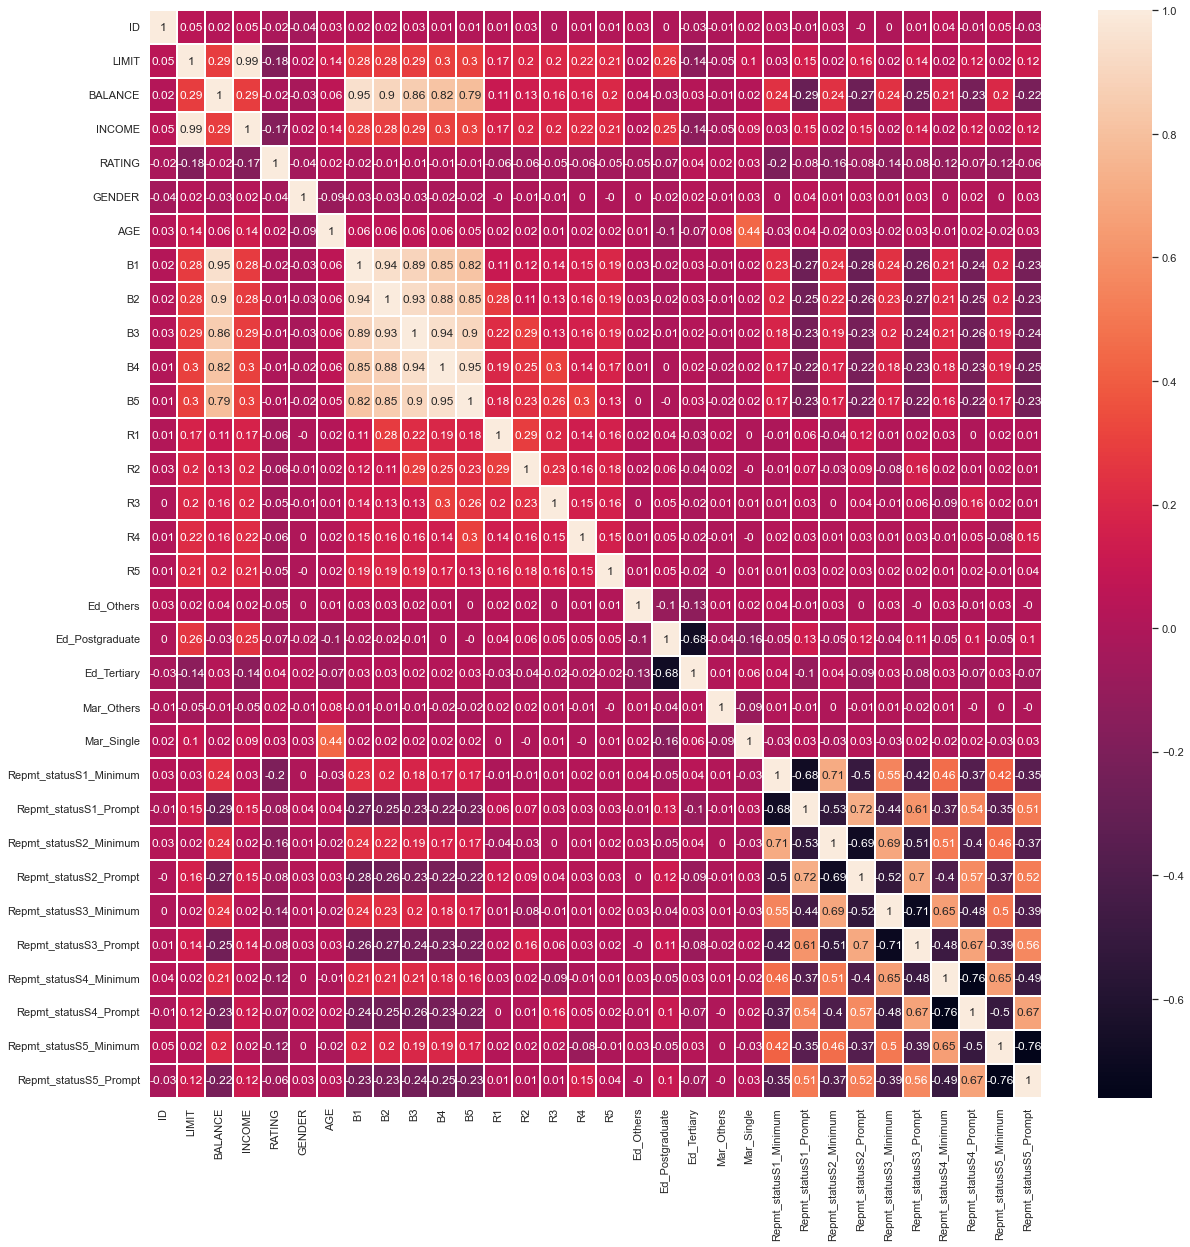

In [37]:
matrix=df.corr().round(2)
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(matrix, annot=True, linewidths=0.3)
plt.show()

Correlation analysis is to find the relationship between the different variables. 
The correlation coefficient shows the strength of the linear relationship.

In [38]:
#Correlation with output variable
cor_target = abs(matrix["B1"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

BALANCE    0.95
B1         1.00
B2         0.94
B3         0.89
B4         0.85
B5         0.82
Name: B1, dtype: float64

## Feature selection with embedded method

In [39]:
x= df.drop(['B1','ID'], axis =1)
y=df['B1']

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 4749354.447326
Best score using built-in LassoCV: 0.947133


In [40]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 22 variables


In [41]:
print("Feature importance using Lasso Model:")
imp_coef = coef.sort_values()
print(imp_coef)

Feature importance using Lasso Model:
R1                       -0.311572
R4                       -0.002996
R5                       -0.000000
Repmt_statusS4_Prompt    -0.000000
Repmt_statusS4_Minimum    0.000000
Repmt_statusS3_Prompt    -0.000000
Repmt_statusS3_Minimum    0.000000
Repmt_statusS2_Prompt    -0.000000
Repmt_statusS2_Minimum    0.000000
Repmt_statusS1_Prompt    -0.000000
Repmt_statusS1_Minimum    0.000000
Mar_Single               -0.000000
Mar_Others                0.000000
Ed_Tertiary              -0.000000
Ed_Postgraduate           0.000000
Repmt_statusS5_Prompt    -0.000000
Repmt_statusS5_Minimum    0.000000
B4                        0.000000
B3                       -0.000000
AGE                       0.000000
GENDER                   -0.000000
RATING                   -0.000000
INCOME                    0.000000
Ed_Others                -0.000000
LIMIT                     0.000828
B5                        0.015164
R3                        0.019924
R2               

In [42]:
#sort the series and also remove zero values
imp_coef = coef.sort_values()
out=imp_coef[imp_coef!=0]
print(out)

R1        -0.311572
R4        -0.002996
LIMIT      0.000828
B5         0.015164
R3         0.019924
R2         0.102686
B2         0.559626
BALANCE    2.474535
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

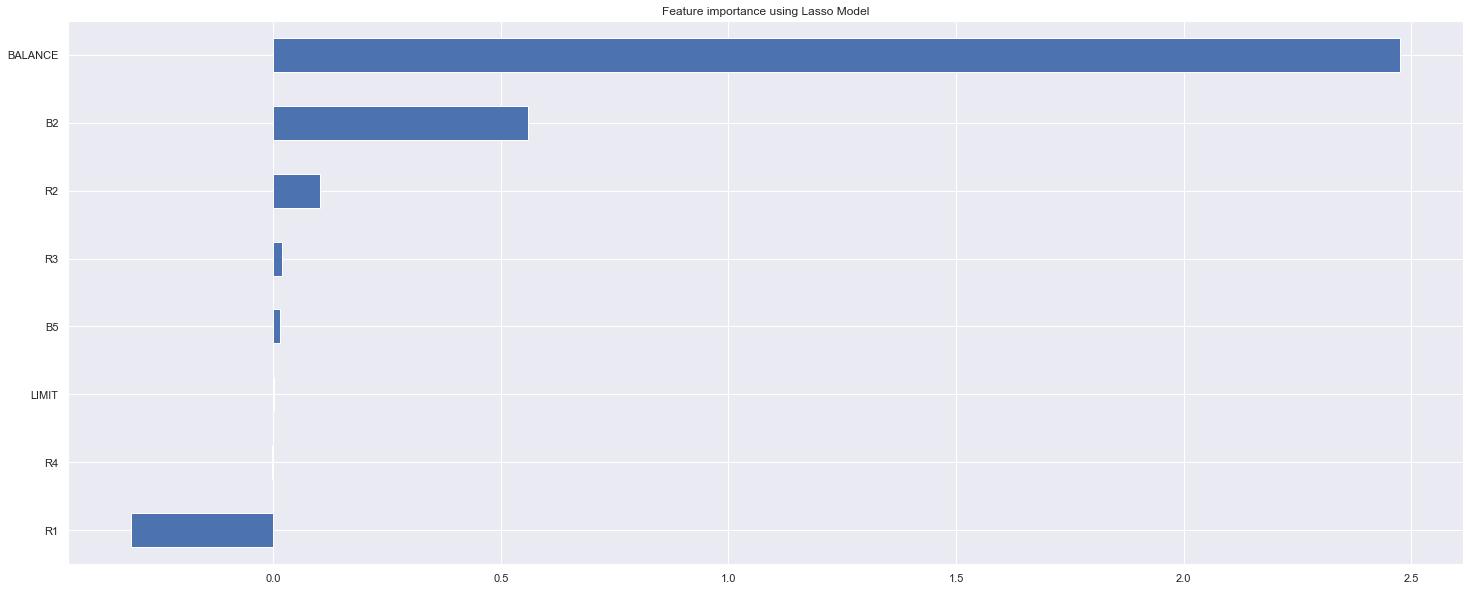

In [43]:
matplotlib.rcParams['figure.figsize'] = (25.0, 10.0)
out.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Linear Regression from features using filter method

In [44]:
# setting the x and y values
x= df[['BALANCE','B2','B3','B4','B5']]
y=df['B1']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#Prediction of test set
y_pred_LR= LR.predict(x_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred_LR))

Prediction for test set: [14470.11422059 31227.6764485   3048.39773542 ... 14722.62566737
   759.73892019 28045.09981495]


In [46]:
#Actual value and the predicted value
LR_diff=pd.DataFrame({'Actual value':y_test,'Predicted value': y_pred_LR})
display(LR_diff)

,Actual value,Predicted value
11218,0,14470.114221
3846,34770,31227.676449
8784,1116,3048.397735
15572,0,1402.381218
12585,47164,45432.208599
...,...,...
12004,116607,112382.121084
3597,37441,38017.577885
2201,16598,14722.625667
11148,518,759.738920


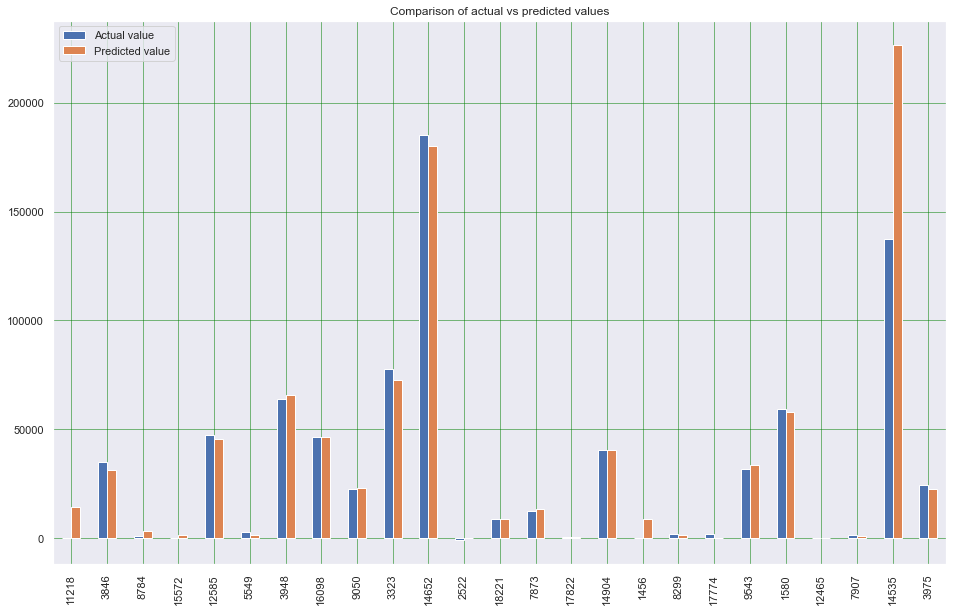

In [47]:
LR_diff = LR_diff.head(25)
LR_diff.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Comparison of actual vs predicted values")
plt.show()

In [48]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_LR)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_LR)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
print('R squared: {:.2f}'.format(LR.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 94.03
Mean Absolute Error: 6251.842993895796
Mean Square Error: 270489460.2925249
Root Mean Square Error: 16446.56378373686


## Linear Regression from features using embedded method

In [49]:
# setting the x and y values
x1= df[['BALANCE','R1','R4','LIMIT','B5','R3','R2','B2']]
y1= df['B1']

# splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

# creating an object of LinearRegression class
LR1 = LinearRegression()
# fitting the training data
LR1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#Prediction of test set
y_pred_LR1= LR1.predict(x1_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred_LR1))

Prediction for test set: [10309.90563046 34920.48787549  3568.90953343 ... 16484.17119311
  1399.67329073 28653.48939957]


In [51]:
#Actual value and the predicted value
LR_diff1=pd.DataFrame({'Actual value':y1_test,'Predicted value': y_pred_LR1})
display(LR_diff1)

,Actual value,Predicted value
11218,0,10309.905630
3846,34770,34920.487875
8784,1116,3568.909533
15572,0,1584.915231
12585,47164,48505.821045
...,...,...
12004,116607,114021.586036
3597,37441,38724.890915
2201,16598,16484.171193
11148,518,1399.673291


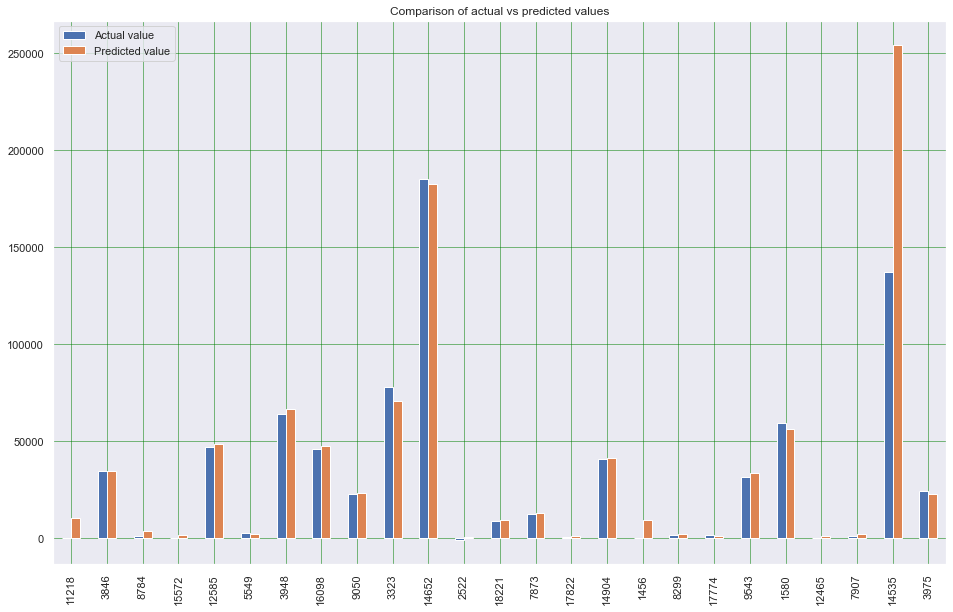

In [52]:
LR_diff1 = LR_diff1.head(25)
LR_diff1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Comparison of actual vs predicted values")
plt.show()

In [53]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y1_test, y_pred_LR1)
meanSqErr = metrics.mean_squared_error(y1_test, y_pred_LR1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_LR1))
print('R squared: {:.2f}'.format(LR1.score(x1,y1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 94.62
Mean Absolute Error: 5980.50352682575
Mean Square Error: 298698871.7531854
Root Mean Square Error: 17282.906924275943


Embedded method yielded better results

Text(0.5, 1.0, 'Actual vs Predicted dependent variable')

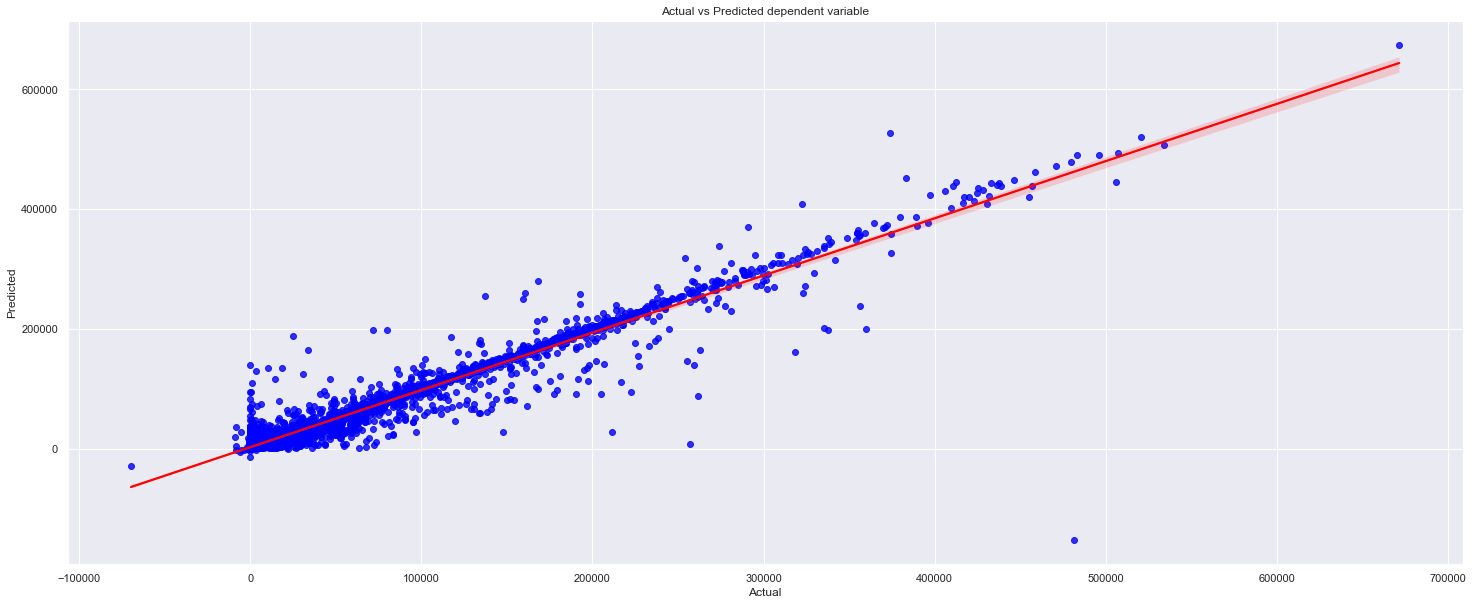

In [54]:
#plt.scatter(x=y1_test,y=y_pred_LR1,color ='blue');
sns.regplot(x=y1_test,y=y_pred_LR1,scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("Actual vs Predicted dependent variable")

# Question 5

# Model Equation (Features selected from embedded method)

In [55]:
# creating an object of LinearRegression class
LR1 = LinearRegression()
# fitting the training data
model= LR1.fit(x1_train,y1_train)

# Intercept and Coefficient
print("Intercept: ",model.intercept_)

print("Coefficients:")
pd.DataFrame(model.coef_,x1_train.columns,columns=['Coeff'])

Intercept:  667.3268490905102
Coefficients:


,Coeff
BALANCE,2.553007
R1,-0.428259
R4,-0.021369
LIMIT,0.002297
B5,0.006971
R3,0.071275
R2,0.167805
B2,0.557173


In [56]:
#double check with statsmodel results
x1_train_f = sm.add_constant(x1_train) # adding a constant

olsmod = sm.OLS(y1_train,x1_train_f).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                     B1   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 2.947e+04
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:26:55   Log-Likelihood:            -1.4616e+05
No. Observations:               13138   AIC:                         2.923e+05
Df Residuals:                   13129   BIC:                         2.924e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        667.3268    240.263      2.777      0.0

/Users/audreytan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
print("The model equation is: ")
print("Predicted Y=667.33+2.5530Balance-0.4283R1-0.0214R4+0.0023LIMIT+0.0070B5+0.0713R3+0.1678R2+0.5572B2")

The model equation is: 
Predicted Y=667.33+2.5530Balance-0.4283R1-0.0214R4+0.0023LIMIT+0.0070B5+0.0713R3+0.1678R2+0.5572B2


#  <center>The End <center>